# Computer Vision Contours

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(10,8));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img);

## Contours

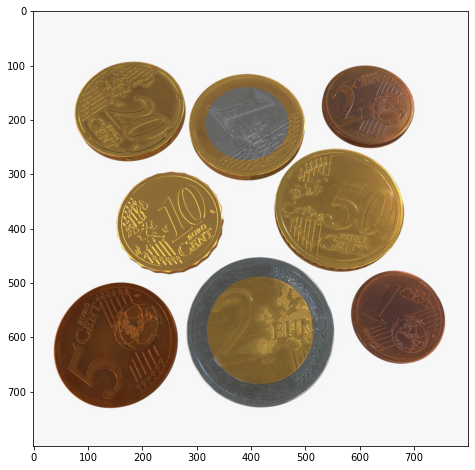

In [51]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)


imshow(rgb_coins);

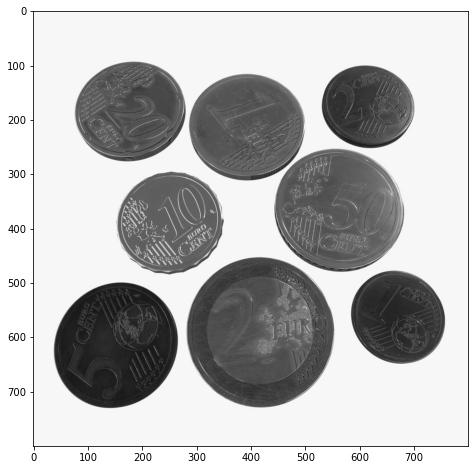

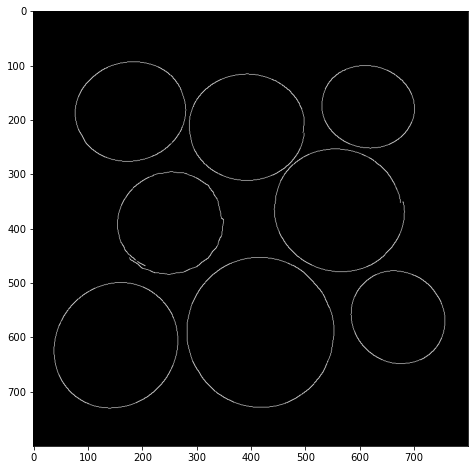

In [52]:
# Convert the image above to grayscale
gray_coins_original = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)
imshow(gray_coins_original, True, False);
gray_coins = gray_coins_original.copy()
# Apply some gaussian blur to it (try differente size kernels)
blur = cv2.GaussianBlur(gray_coins, (9,9), 0)


# Apply Canny to find edges and display the image 
canny = cv2.Canny(blur,100,200)

imshow(canny, True, False)

In [53]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
ret, th = cv2.threshold(canny, 128, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

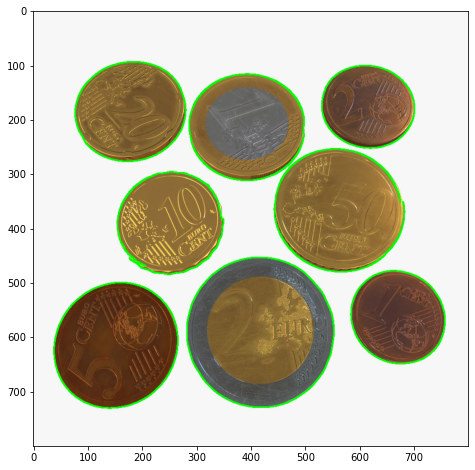

In [54]:
gray_coins_1 = rgb_coins.copy()

cv2.drawContours(gray_coins_1, contours, -1, (0,255,0),2)
imshow(gray_coins_1)

In [28]:
# print the number of contours that has been found
len(contours)

9

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [29]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
!ls img

4.png      coins.jpg  coins2.jpg coins3.jpg coins5.jpg coins6.jpg


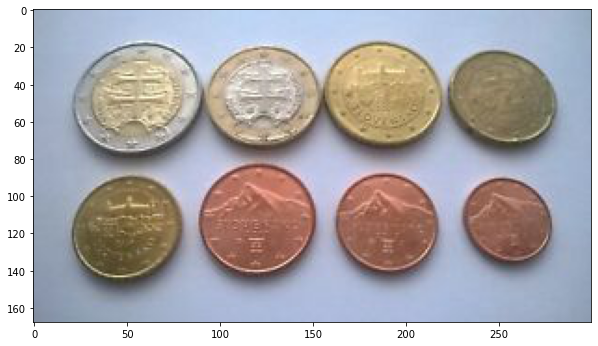

In [41]:
color_coins = cv2.imread('img/coins3.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)


imshow(rgb_coins);

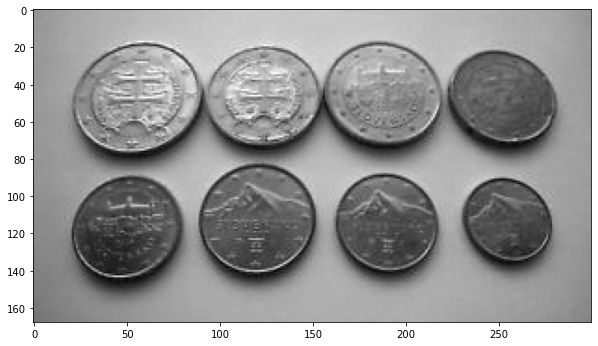

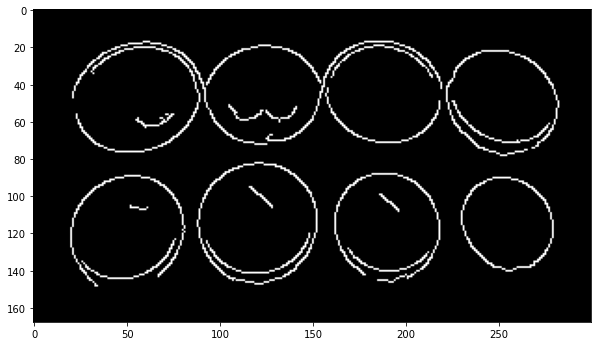

In [43]:
# Convert the image above to grayscale
gray_coins_original = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)
imshow(gray_coins_original, True, False);
gray_coins = gray_coins_original.copy()
# Apply some gaussian blur to it (try differente size kernels)
blur = cv2.GaussianBlur(gray_coins, (5,5), 0)


# Apply Canny to find edges and display the image 
canny = cv2.Canny(blur,100,200)

imshow(canny, True, False)

In [44]:
ret, th = cv2.threshold(canny, 128, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

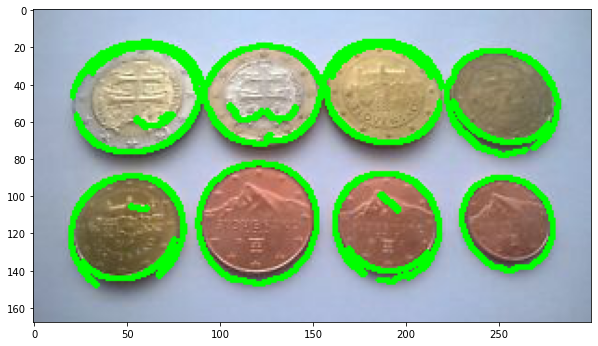

In [45]:
gray_coins_1 = rgb_coins.copy()

cv2.drawContours(gray_coins_1, contours, -1, (0,255,0),2)
imshow(gray_coins_1)

In [46]:
len(contours)

19

## Sorting Contours

### By area

In [55]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [ ]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


In [56]:
# Print the contour areas to screen
contour_areas = get_contour_areas(contours)
contour_areas

[41163.5, 23118.5, 7.5, 58477.5, 160.5, 183.0, 162.0, 20331.5, 29250.5]

In [61]:
# Now sort the areas by biggest to smallest and print the sorted areas
contour_areas = get_contour_areas(contours)
descending_contour_areas = sorted(contour_areas, reverse = True)

print(descending_contour_areas)



[58477.5, 41163.5, 29250.5, 23118.5, 20331.5, 183.0, 162.0, 160.5, 7.5]


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [62]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
ascending_contour_areas = sorted(contour_areas)
print(ascending_contour_areas)

[7.5, 160.5, 162.0, 183.0, 20331.5, 23118.5, 29250.5, 41163.5, 58477.5]


In [63]:
# Filter out only the 5 biggest contours and print them
five_biggest = descending_contour_areas[:5]
five_biggest



[58477.5, 41163.5, 29250.5, 23118.5, 20331.5]

[Hint](# "Just slice the array!") 

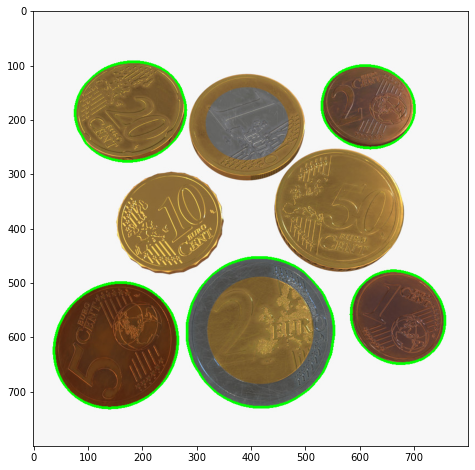

In [65]:
# Now in a clean image draw the contours you just filtered out and display it
filtered_contours = rgb_coins.copy()

sorted_cont = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(filtered_contours, sorted_cont[:5], -1, (0, 255, 0), 3)

plt.figure(figsize = (12,8))
plt.imshow(filtered_contours);



In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
